# MOA "Array Interface"

This is very much a work in progress. I want to see how far a python wrapper around a moa interface will take us.

In [1]:
from moa.frontend import LazyArray

In [4]:
A = LazyArray(name='A', shape=(3, 'm'))
B = LazyArray(name='B', shape=(3,))
C = LazyArray(name='C', shape=(3, 3))

expression = ((A.T)[0] - 1).outer('*', B) + C + 'n'

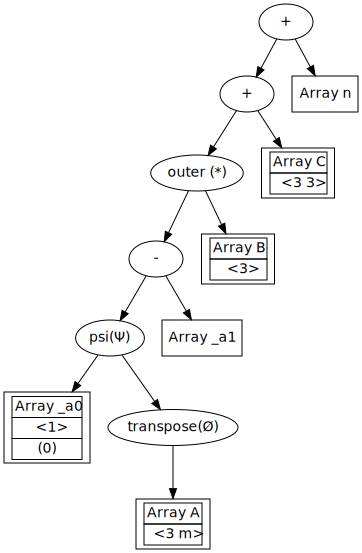

In [5]:
expression

In [6]:
print(expression.compile())



def f(A, B, C, n):
    
    if (not ((len(n.shape) == 0) and ((len(C.shape) == 2) and ((len(B.shape) == 1) and (len(A.shape) == 2))))):
        
        raise Exception('arguments have invalid dimension')
    
    m = A.shape[1]
    
    if (not (((3 == C.shape[1]) and ((3 == C.shape[0]) and ((3 == B.shape[0]) and (3 == A.shape[0])))) and (0 < m))):
        
        raise Exception('arguments have invalid shape')
    
    _a28 = Array((3, 3))
    
    for _i9 in range(0, 3):
        
        for _i8 in range(0, 3):
            
            _a28[(_i8, _i9)] = ((((A[(_i8, 0)] - 1) * B[(_i9,)]) + C[(_i8, _i9)]) + n)
    return _a28


In [10]:
from moa.array import Array

A = Array(shape=(3, 4), value=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12))
B = Array(shape=(3,), value=(13, 14, 15))
C = Array(shape=(3, 3), value=(16, 17, 18, 19, 20, 21, 22, 23, 24))
n = Array(shape=(), value=(4,))

exec(expression.compile())

D = f(A=A, B=B, C=C, n=n)

print('shape', D.shape)
print('value', D.value)

shape (3, 3)
value [20, 21, 22, 75, 80, 85, 130, 139, 148]
